# Create map pickles

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import numpy as np
import cmocean
import pickle
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])
tmask = np.array(mesh.variables['tmask']) 
land_mask = np.ma.masked_where((tmask[0,:,:,:] > 0.1), tmask[0,:,:,:]) 

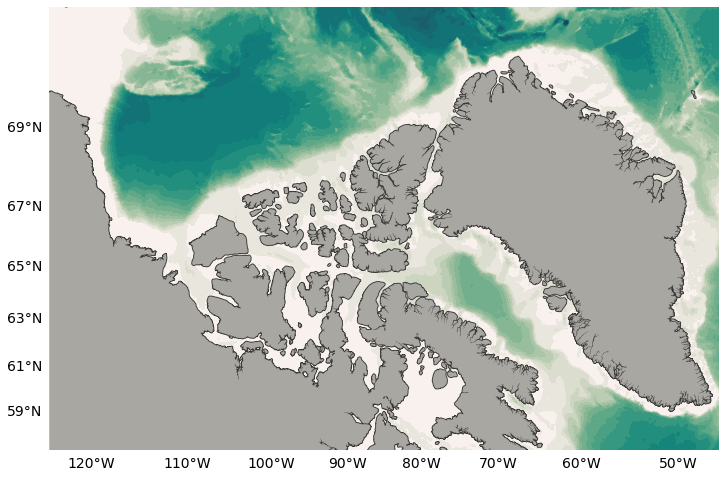

In [5]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

land_color = '#a9a7a2'

x_model, y_model = proj1(lon, lat)
proj1.drawcoastlines(color='#373736', linewidth=1.8)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

# bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.diff_r, vmin=-5000, vmax=5000, zorder=1)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

ax1.set_frame_on(False)

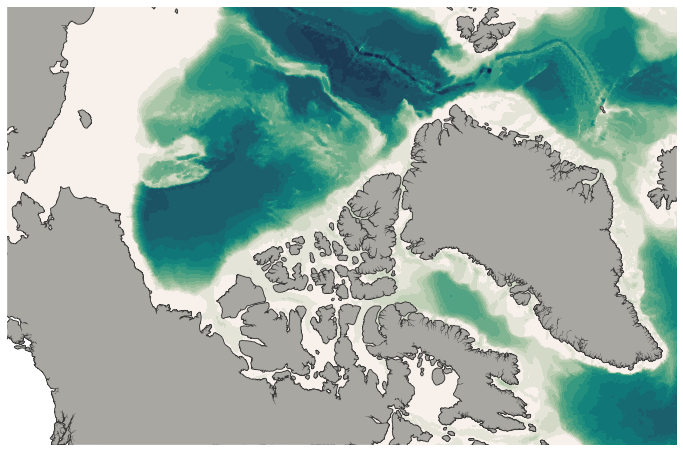

In [12]:
fig, ax1 = plt.subplots(figsize=(12,9))

proj1=Basemap(projection='stere',lat_0 = 80, lon_0 = -95, resolution='i', width=5.5e6, height=3.6e6, ax=ax1)

x_model, y_model = proj1(lon, lat)
proj1.drawcoastlines(color='#373736', linewidth=1.8)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=5);

bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=5000, zorder=1)

ax1.set_frame_on(False)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/Canada-Basin-map.png', bbox_inches='tight')